<a href="https://colab.research.google.com/github/marcelodepaoli/15_Arvores_de_Decisao/blob/main/01_%C3%81rvores_de_Decis%C3%A3o_e_Florestas_Aleat%C3%B3rias_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de Decisão e Florestas Aleatórias em Python

## Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtenha os dados

In [ ]:
# Esse trecho do código é obrigatório para quem estiver fazendo tudo pelo colab
# Caso você esteja utilizando o jupyter pode comentar/apagar
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/IA/15_Árvores_de_Decisão")
os.listdir()

Mounted at /content/drive


['kyphosis.csv',
 'loan_data.csv',
 '03 - Projeto Árvores de Decisão e Floresta Aleatória - SOLUÇÕES.ipynb',
 '02 - Projeto Árvores de Decisão e Floresta Aleatória.ipynb',
 '01_Árvores_de_Decisão_e_Florestas_Aleatórias_em_Python.ipynb']

In [ ]:
df = pd.read_csv('kyphosis.csv')

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

Vamos apenas verificar um gráfico de pares simples para este pequeno conjunto de dados.

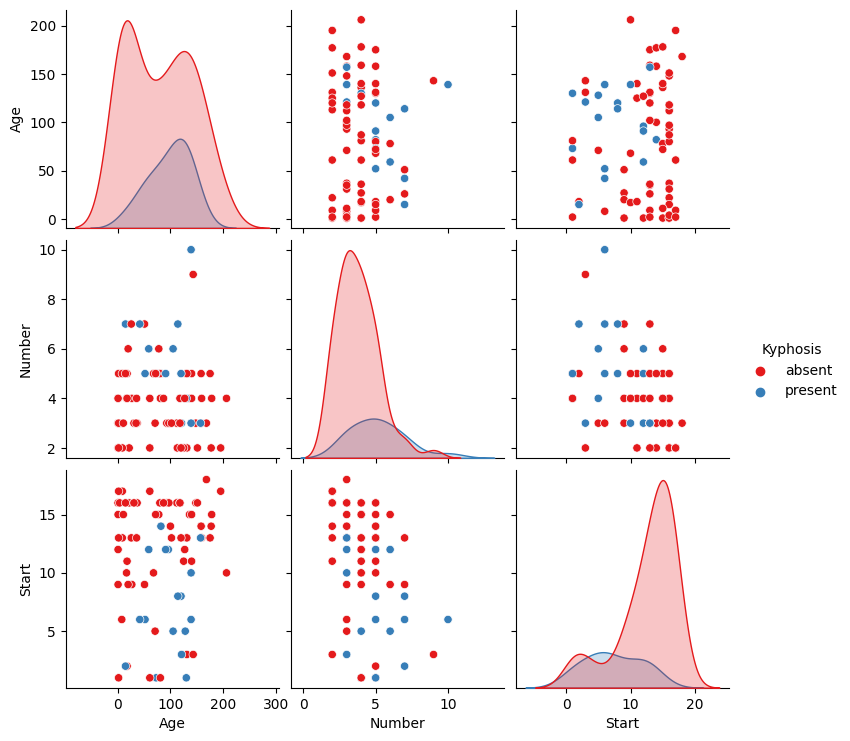

In [ ]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

## Train Test Split

Vamos dividir os dados em um conjunto de treinamento e um conjunto de teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1)

In [ ]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [ ]:
y = df['Kyphosis']

In [ ]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [ ]:
y = pd.get_dummies(y,columns='Kyphosis',drop_first=True)

In [ ]:
y.head()

,present
0,0
1,0
2,1
3,0
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Árvores de decisão

Começaremos treinando uma única árvore de decisão.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Previsões e avaliações

Vamos avaliar nossa árvore de decisão.

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [ ]:
print(confusion_matrix(y_test,predictions))

[[12  5]
 [ 6  2]]


## Visualização da Árvore

O Scikit learn na verdade tem alguns recursos de visualização integrados para árvores de decisão, você não utilizara esse recurso com frequência e é necessário instalar a biblioteca pydot

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
features = list(df.columns[1:])

In [ ]:
features

['Age', 'Number', 'Start']

In [ ]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True,impurity=False)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

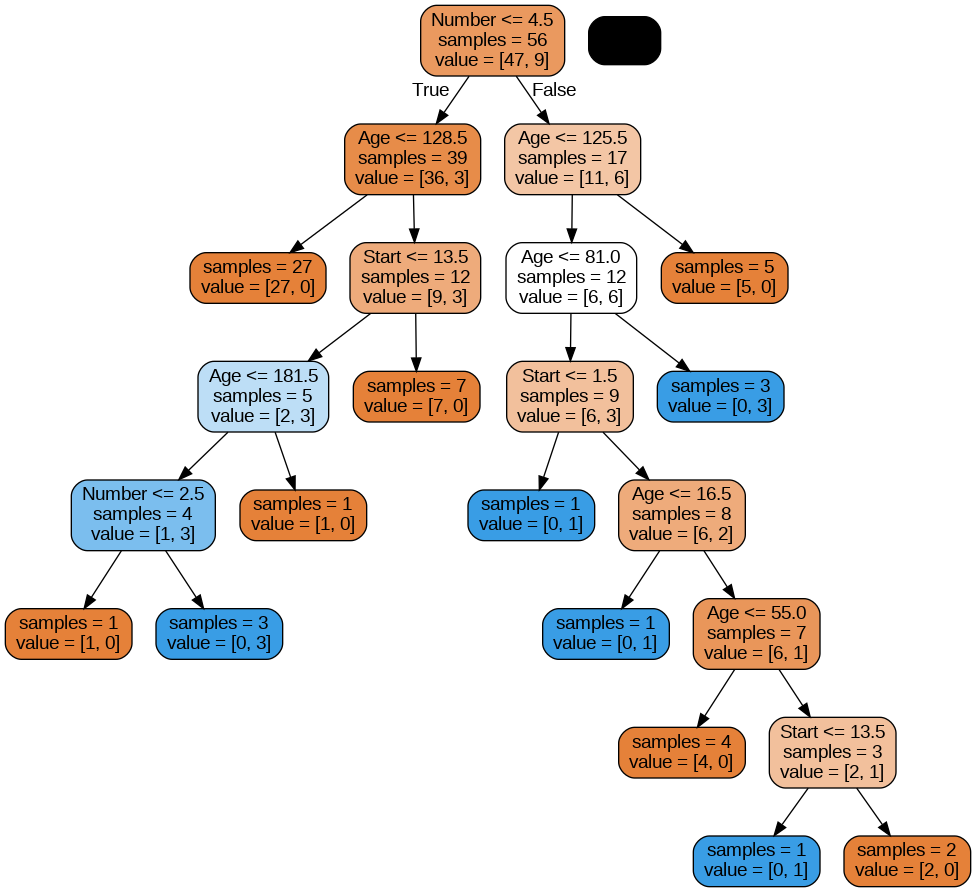

In [ ]:
Image(graph.create_png())


## Florestas Aleatórias

Agora vamos comparar o modelo de árvore de decisão com uma floresta aleatória.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(X_train, y_train)

<ipython-input-30-823e2bba21ee>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[17  0]
 [ 6  2]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [ ]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64